In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from IPython.display import display

import ezhc as hc

In [2]:
pd.__version__

'0.24.2'

In [3]:
np.__version__

'1.16.5'

## Examples
+ reproduced from http://www.highcharts.com/demo/ and http://www.highcharts.com/stock/demo
+ `plot()` has the following arguments:
  + `save=True` and optionally `save_name` and optionally `save_path` (default='saved') will save the graph as a stand alone HTML doc under `save_path` after creating it if necessary
  + `notebook` (default=True) will not inject `require` and `jquery` libs as they are already available in the classical notebook. Set to False to inject them.
  + `version` (default='latest') will specify the highcharts version to use. It is recommended to leave the default value (6.1.2 as of 4sep18).
  + `proxy` (default=None') is necessary if you want to check from [highcharts release page](https://github.com/highcharts/highcharts/releases) what the latest version is, and update the list of all past versions. If no proxy is provided, the versions are [hardcoded](https://github.com/oscar6echo/ezhc/blob/64a1afbfae19197bbef8f8c916347df0c8667643/ezhc/_hc_versions.py#L27) in the source code.
  
+ `options_as_dict()` will return highchart/highstocks options as a Python dictionary
  + args: `chart_id` to specify which div for rendering


+ `options_as_json()` will return highchart/highstocks options as json
  + args: Same save options as `plot()`


## Times series

### Example 1

In [4]:
df = hc.sample.df_timeseries(N=2, Nb_bd=15+0*3700) #<=473
df.info()
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2015-01-01 to 2015-01-21
Freq: B
Data columns (total 2 columns):
Track1    15 non-null float64
Track2    15 non-null float64
dtypes: float64(2)
memory usage: 360.0 bytes


Track1    Track2
2015-01-01  1.000000  1.000000
2015-01-02  0.995581  0.993390
2015-01-05  0.972516  1.002118
2015-01-06  0.955501  1.006376
2015-01-07  0.973585  0.989508

Track1    Track2
2015-01-15  0.906900  0.981129
2015-01-16  0.922057  0.955343
2015-01-19  0.932390  0.940033
2015-01-20  0.922188  0.934606
2015-01-21  0.907404  0.917937

In [5]:
g = hc.Highstock()

g.chart.width = 650
g.chart.height = 550
g.legend.enabled = True
g.legend.layout = 'horizontal'
g.legend.align = 'center'
g.legend.maxHeight = 100
g.tooltip.enabled = True
g.tooltip.valueDecimals = 2
g.exporting.enabled = True

g.chart.zoomType = 'xy'
g.title.text = 'Time series plotted with HighStock'
g.subtitle.text = 'Transparent access to the underlying js lib'

g.plotOptions.series.compare = 'percent'
g.yAxis.labels.formatter = hc.scripts.FORMATTER_PERCENT
g.tooltip.pointFormat = hc.scripts.TOOLTIP_POINT_FORMAT_PERCENT
g.tooltip.positioner = hc.scripts.TOOLTIP_POSITIONER_CENTER_TOP

g.xAxis.gridLineWidth = 1.0
g.xAxis.gridLineDashStyle = 'Dot'
g.yAxis.gridLineWidth = 1.0
g.yAxis.gridLineDashStyle = 'Dot'

g.credits.enabled = True
g.credits.text = 'Source: XXX Flow Strategy & Solutions.'
g.credits.href = 'http://www.example.com'

g.series = hc.build.series(df)

g.plot(save=False, version='6.1.2', center=True)

## IF BEHIND A CORPORATE PROXY
## IF NOT PROXY IS PASSED TO .plot() THEN NO HIGHCHARTS VERSION UPDATE IS PERFORMED
## HARDODED VERSIONS ARE USED INSTEAD
# p = hc.Proxy('mylogin', 'mypwd', 'myproxyhost', 'myproxyport')
# g.plot(save=False, version='latest', proxy=p)


In [6]:
options_as_dict = g.options_as_dict()
options_as_dict

{'credits': {'enabled': True,
  'text': 'Source: XXX Flow Strategy & Solutions.',
  'href': 'http://www.example.com'},
 'exporting': {'enabled': True},
 'chart': {'animation': False,
  'width': 650,
  'height': 550,
  'zoomType': 'xy',
  'renderTo': 'chart_id'},
 'plotOptions': {'series': {'animation': False, 'compare': 'percent'},
  'line': {'animation': False},
  'column': {'animation': False}},
 'legend': {'enabled': True,
  'layout': 'horizontal',
  'align': 'center',
  'maxHeight': 100},
 'tooltip': {'enabled': True,
  'valueDecimals': 2,
  'pointFormat': '<span style="color:{series.color}">{series.name}</span>: <b>{point.y}</b> ({point.change}%)<br/>',
  'positioner': "function (labelWidth, labelHeight, point) {\n    var roundUp100 = function(d) { return 100*Math.floor(d/100); },\n        labelWidth = roundUp100(labelWidth),\n        chart = window.charts['__uuid__'];\n\n    var tooltipX, tooltipY;\n        var testX = (point.plotX + labelWidth * 0.7 > chart.plotWidth / 2) && (po

In [7]:
options_as_json = g.options_as_json()
options_as_json

'{"credits":{"enabled":true,"text":"Source: XXX Flow Strategy & Solutions.","href":"http:\\/\\/www.example.com"},"exporting":{"enabled":true},"chart":{"animation":false,"width":650,"height":550,"zoomType":"xy","renderTo":"chart_id"},"plotOptions":{"series":{"animation":false,"compare":"percent"},"line":{"animation":false},"column":{"animation":false}},"legend":{"enabled":true,"layout":"horizontal","align":"center","maxHeight":100},"tooltip":{"enabled":true,"valueDecimals":2,"pointFormat":"<span style=\\"color:{series.color}\\">{series.name}<\\/span>: <b>{point.y}<\\/b> ({point.change}%)<br\\/>","positioner":"function (labelWidth, labelHeight, point) {\\n    var roundUp100 = function(d) { return 100*Math.floor(d\\/100); },\\n        labelWidth = roundUp100(labelWidth),\\n        chart = window.charts[\'__uuid__\'];\\n\\n    var tooltipX, tooltipY;\\n        var testX = (point.plotX + labelWidth * 0.7 > chart.plotWidth \\/ 2) && (point.plotX - labelWidth * 0.7 < chart.plotWidth \\/ 2);\\

### Example 2

In [8]:
df = hc.sample.df_timeseries(N=3, Nb_bd=2000)
df['Cash'] = 1.0+0.02/260
df['Cash'] = df['Cash'].cumprod()
display(df.head())
display(df.tail())

Track1    Track2    Track3      Cash
2015-01-01  1.000000  1.000000  1.000000  1.000077
2015-01-02  0.995581  1.005348  0.966949  1.000154
2015-01-05  0.972516  1.010849  0.989969  1.000231
2015-01-06  0.955501  1.029556  0.982879  1.000308
2015-01-07  0.973585  1.016824  0.973665  1.000385

Track1    Track2    Track3      Cash
2022-08-25  0.529755  1.523684  0.824704  1.165946
2022-08-26  0.539018  1.538276  0.820019  1.166035
2022-08-29  0.540658  1.536633  0.812321  1.166125
2022-08-30  0.555569  1.532476  0.818423  1.166215
2022-08-31  0.546018  1.506516  0.828384  1.166305

In [9]:
g = hc.Highstock()

g.chart.height = 550
g.legend.enabled = True
g.legend.layout = 'horizontal'
g.legend.align = 'center'
g.legend.maxHeight = 100
g.tooltip.enabled = True
g.tooltip.valueDecimals = 2
g.exporting.enabled = True

g.chart.zoomType = 'xy'
g.title.text = 'Time series plotted with HighStock'
g.subtitle.text = 'Transparent access to the underlying js lib'

g.plotOptions.series.compare = 'percent'
g.yAxis.labels.formatter = hc.scripts.FORMATTER_PERCENT
g.tooltip.pointFormat = hc.scripts.TOOLTIP_POINT_FORMAT_PERCENT
g.tooltip.positioner = hc.scripts.TOOLTIP_POSITIONER_CENTER_TOP

g.xAxis.gridLineWidth = 1.0
g.xAxis.gridLineDashStyle = 'Dot'
g.yAxis.gridLineWidth = 1.0
g.yAxis.gridLineDashStyle = 'Dot'

g.credits.enabled = True
g.credits.text = 'Source: XXX Flow Strategy & Solutions.'
g.credits.href = 'http://www.example.com'


g.series = hc.build.series(df, visible={'Track3': False})


g.plot(save=True, version='6.1.2', save_name='NoTable')

### Example 3

### Exception
+ The function2 `plot_with_table1()` and `plot_with_table2()` are exceptions with respect to the idea of this module: It is NOT just transparent access to Highchart/Highstock. I added a table (based on datatable.net) to display more data about the period selected. This measurements cannot be calculated beforehand, so it has to be postprocessing.  
+ If `save=True` function `plot_with_table1/2()` will create a standalone HTML file containing the output in subdirectory 'saved'. Optionally `save_name` can be set - an automatic time tag is added to keep things orderly, unless `dated=False`.  
+ **NOTE**: Because of css collision between notebook and datatable, the table in the saved file is better looking than in the notebook output area.


In [10]:
# g.plot_with_table_1(dated=False, version='6.1.2', save=True, save_name='Table1')

### Example 4

### Footer
+ A footer can be added to the plot. This is interesting if the plot is saved as a stand alone file.
+ The footer is HTML you can write from scratch but a helper function and a jinja template make it easy.
+ Images are embeded upon save so the saved file is standalone. Only an internet connection is required to download the js libraries.


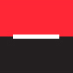

In [11]:
g.plotOptions.series.compare = 'value'
g.yAxis.labels.formatter = hc.scripts.FORMATTER_BASIC
g.tooltip.pointFormat = hc.scripts.TOOLTIP_POINT_FORMAT_BASIC
g.tooltip.formatter = hc.scripts.FORMATTER_QUANTILE

disclaimer = """
THE VALUE OF YOUR INVESTMENT MAY FLUCTUATE. 
THE FIGURES RELATING TO SIMULATED PAST PERFORMANCES REFER TO PAST 
PERIODS AND ARE NOT A RELIABLE INDICATOR OF FUTURE RESULTS. 
THIS ALSO APPLIES TO HISTORICAL MARKET DATA.
"""
template_footer = hc.scripts.TEMPLATE_DISCLAIMER
create_footer = hc.scripts.from_template

logo_path = hc.scripts.PATH_TO_LOGO_SG
# logo_path = 'http://img.talkandroid.com/uploads/2015/11/Chrome-Logo.png'
# logo_path = hc.scripts.image_src('http://img.talkandroid.com/uploads/2015/11/Chrome-Logo.png')

footer = create_footer(template_footer, comment=disclaimer, img_logo=logo_path)

g.plot_with_table_2(dated=False, version='6.1.2', save=True, save_name='Table2', footer=footer)

## Column, Bar

In [12]:
df = hc.sample.df_one_idx_several_col()
df

Jane  Joe  John
Fruit                   
Apples      2    3     5
Oranges     2    4     3
Pears       3    4     4
Grapes      2    2     7
Bananas     1    5     2

In [13]:
g = hc.Highcharts()

g.chart.type = 'column'
g.chart.width = 500
g.chart.height = 300
# g.plotOptions.column.animation = False

g.title.text = 'Basic Bar Chart'
g.yAxis.title.text = 'Fruit Consumption'

g.xAxis.categories = list(df.index)
g.series = hc.build.series(df)

g.plot(center=True, save=True, version='6.1.2', save_name='test', dated=False)

In [14]:
g.plotOptions.column.stacking = 'normal'
g.title.text = 'Stack Bar Chart'
g.yAxis.title.text = 'Total Fruit Consumption'

g.plot(version='6.1.2')

In [15]:
g.plotOptions.column.stacking = 'percent'
g.yAxis.title.text = 'Fruit Consumption Distribution'

g.plot(version='6.1.2')

In [16]:
g = hc.Highcharts()

g.chart.type = 'bar'
g.chart.width = 500
g.chart.height = 400

g.title.text = 'Basic Bar Chart'
g.xAxis.title.text = 'Fruit Consumption'

g.xAxis.categories = list(df.index)
g.series = hc.build.series(df)

g.plot()

In [17]:
g.plotOptions.bar.stacking = 'normal'

g.title.text = 'Stacked Bar Chart'
g.xAxis.title.text = 'Total Fruit Consumption'

g.plot(version='6.1.2')

In [18]:
g.plotOptions.bar.stacking = 'percent'

g.title.text = 'Stacked Bar Chart'
g.xAxis.title.text = 'Fruit Consumption Distribution'

g.plot(version='6.1.2')

## Pie

In [19]:
df = hc.sample.df_one_idx_one_col()
df

MktShare
Brand            
Firefox      45.0
IE           26.8
Chrome       12.8
Safari        8.5
Opera         6.2
Others        0.7

In [20]:
g = hc.Highcharts()

g.chart.type = 'pie'
g.chart.width = 400
g.chart.height = 400
gpo = g.plotOptions.pie
gpo.showInLegend = True
gpo.dataLabels.enabled = False

g.title.text = 'Browser Market Share'

g.series = hc.build.series(df)

g.plot(version='6.1.2')

In [21]:
g.chart.width = 400
g.chart.height = 300

gpo.showInLegend = False
gpo.dataLabels.enabled = True

gpo.startAngle = -90
gpo.endAngle = 90
gpo.innerSize = '40%'
gpo.center = ['50%', '95%']

g.plot(version='6.1.2')

## Pie, Column Drilldown

In [22]:
df = hc.sample.df_two_idx_one_col()
df.head()

Market Share
Brand             Version              
Internet Explorer 6.0              6.40
                  7.0              3.55
                  8.0             26.70
                  9.0             16.96
Firefox           2.0              0.09

In [23]:
g = hc.Highcharts()

g.chart.type = 'pie'
g.chart.width = 500
g.chart.height = 500
g.exporting = False
gpo = g.plotOptions.pie
gpo.showInLegend = False
gpo.dataLabels.enabled = True
gpo.center = ['50%', '50%']
gpo.size = '65%'
g.drilldown.drillUpButton.position = {'x': 0, 'y': 0}

g.title.text = 'Browser Market Share'

g.series, g.drilldown.series = hc.build.series_drilldown(df)

g.plot(version='6.1.2')

In [24]:
g = hc.Highcharts()

g.chart.type = 'bar'
g.chart.width = 500
g.chart.height = 500
g.exporting = False
gpo = g.plotOptions.pie
gpo.showInLegend = False
gpo.dataLabels.enabled = True
gpo.center = ['50%', '50%']
gpo.size = '65%'
g.drilldown.drillUpButton.position = {'x': 0, 'y': 0}

g.title.text = 'Browser Market Share'

g.series, g.drilldown.series = hc.build.series_drilldown(df)

g.plot()

## Pie Drilldown - 3 levels
+ Any number of levels works

In [25]:
df = hc.sample.df_several_idx_one_col_2()
df.head()

Population
Continent Region         Country                             
Africa    Central Africa Angola                    29784193.0
                         Cameroon                  24053727.0
                         Central African Republic   4659080.0
                         Chad                      14899994.0
                         Congo                      5260750.0

In [26]:
df

Population
Continent Region                    Country                                      
Africa    Central Africa            Angola                             29784193.0
                                    Cameroon                           24053727.0
                                    Central African Republic            4659080.0
                                    Chad                               14899994.0
                                    Congo                               5260750.0
                                    Democratic Republic of the Congo   81339988.0
                                    Equatorial Guinea                   1267689.0
                                    Gabon                               2025137.0
                                    Sao Tome and Principe                204327.0
          Eastern Africa            Burundi                            10864245.0
                                    Comoros                              813912.0
                                    Djibouti                             956985.0
                                    Eritrea                             5068831.0
                                    Ethiopia                          104957438.0
                                    Kenya                              49699862.0
                                    Madagascar                         25570895.0
                                    Malawi                             18622104.0
                                    Mauritius                           1265138.0
                                    Mayotte                              253045.0
                                    Mozambique                         29668834.0
                                    Rwanda                             12208407.0
                                    Réunion                              876562.0
                                    Seychelles                            94737.0
                                    Somalia                            14742523.0
                                    South Sudan                        12575714.0
                                    Tanzania                           57310019.0
                                    Uganda                             42862958.0
                                    Zambia                             17094130.0
                                    Zimbabwe                           16529904.0
          North Africa              Algeria                            41318142.0
...                                                                           ...
Europe    Western Europe            France                             64979548.0
                                    Germany                            82114224.0
                                    Liechtenstein                         37922.0
                                    Luxembourg                           583455.0
                                    Monaco                                38695.0
                                    Netherlands                        17035938.0
                                    Switzerland                         8476005.0
Oceanic   Australia and New Zealand Australia                          24450561.0
                                    New Zealand                         4705818.0
          Melanesia                 Fiji                                 905502.0
                                    New Caledonia                        276255.0
                                    Papua New Guinea                          NaN
                                    Solomon Islands                      611343.0
                                    Vanuatu                              276244.0
          Micronesia                Federated States of Micronesia       105544.0
                                    Guam                                 164229.0
                                    Kiribati         

In [27]:
# g = hc.Highcharts()

# g.chart.type = 'pie'
# g.chart.width = 500
# g.chart.height = 500
# g.exporting = False
# gpo = g.plotOptions.pie
# gpo.showInLegend = False
# gpo.dataLabels.enabled = True
# gpo.center = ['50%', '50%']
# gpo.size = '65%'
# g.drilldown.drillUpButton.position = {'x': 0, 'y': 0}

# g.title.text = 'World Population'

# g.series, g.drilldown.series = hc.build.series_drilldown(df, top_name='World')

# # g.plot(version='6.1.2')

## Column Range

In [28]:
df = hc.sample.df_one_idx_two_col()
df.head()

Min   Max
Month           
Jan   -9.7   9.4
Feb   -8.7   6.5
Mar   -3.5   9.4
Apr   -1.4  19.9
May    0.0  22.6

In [29]:
g = hc.Highcharts()
g.chart.type = 'columnrange'
g.chart.inverted = True
g.chart.width = 700
g.chart.height = 400
gpo = g.plotOptions.columnrange
gpo.dataLabels.enabled = True
gpo.dataLabels.formatter = 'function() { return this.y + "°C"; }'
g.tooltip.valueSuffix = '°C'
g.xAxis.categories, g.series = hc.build.series_range(df)
g.series[0]['name'] = 'Temperature'
g.yAxis.title.text = 'Temperature (°C)'
g.xAxis.title.text = 'Month'
g.title.text = 'Temperature Variations by Month'
g.subtitle.text = 'Vik, Norway'

g.legend.enabled = False

g.plot(save=True, save_name='index', version='6.1.2', dated=False, notebook=False)

## Scatter - 1

In [30]:
df = hc.sample.df_scatter()
df.head()

Sex
Height Weight        
161.2  51.6    Female
167.5  59.0    Female
159.5  49.2    Female
157.0  63.0    Female
155.8  53.6    Female

In [31]:
g = hc.Highcharts()
g.chart.type = 'scatter'
g.chart.width = 700
g.chart.height = 500
g.chart.zoomType = 'xy'
g.exporting = False

g.plotOptions.scatter.marker.radius = 5

g.tooltip.headerFormat = '<b>Sex: {series.name}</b><br>'
g.tooltip.pointFormat = '{point.x} cm, {point.y} kg'

g.legend.layout = 'vertical'
g.legend.align = 'left'
g.legend.verticalAlign = 'top'
g.legend.x = 100
g.legend.y = 70
g.legend.floating = True
g.legend.borderWidth = 1
                
g.xAxis.title.text = 'Height (cm)'
g.yAxis.title.text = 'Weight (kg)'
g.title.text = 'Height Versus Weight of 507 Individuals by Gender'
g.subtitle.text = 'Source: Heinz 2003'
                
g.series = hc.build.series_scatter(df, color_column='Sex',
                                   color={'Female': 'rgba(223, 83, 83, .5)',
                                          'Male': 'rgba(119, 152, 191, .5)'})
g.plot(version='6.1.2')

## Scatter - 2

In [32]:
df = hc.sample.df_scatter()
df['Tag'] = np.random.choice(range(int(1e5)), size=len(df), replace=False)
df.head()

Sex    Tag
Height Weight               
161.2  51.6    Female  18990
167.5  59.0    Female  57774
159.5  49.2    Female  10695
157.0  63.0    Female   1706
155.8  53.6    Female  64970

In [33]:
g = hc.Highcharts()
g.chart.type = 'scatter'
g.chart.width = 700
g.chart.height = 500
g.chart.zoomType = 'xy'
g.exporting = False

g.plotOptions.scatter.marker.radius = 5

g.tooltip.headerFormat = '<b>Sex: {series.name}</b><br><b>Tag: {point.key}</b><br>'
g.tooltip.pointFormat = '{point.x} cm, {point.y} kg'

g.legend.layout = 'vertical'
g.legend.align = 'left'
g.legend.verticalAlign = 'top'
g.legend.x = 100
g.legend.y = 70
g.legend.floating = True
g.legend.borderWidth = 1
                
g.xAxis.title.text = 'Height (cm)'
g.yAxis.title.text = 'Weight (kg)'
g.title.text = 'Height Versus Weight of 507 Individuals by Gender'
g.subtitle.text = 'Source: Heinz 2003'
                
g.series = hc.build.series_scatter(df, color_column='Sex', title_column='Tag',
                                   color={'Female': 'rgba(223, 83, 83, .5)',
                                          'Male': 'rgba(119, 152, 191, .5)'})
g.plot(version='6.1.2')

## Bubble

In [34]:
df = hc.sample.df_bubble()
df.head()

Size
Cat  x  y       
Cat1 97 36    79
     94 74    60
     68 76    58
     64 87    56
     68 27    73

In [35]:
g = hc.Highcharts()
g.chart.type = 'bubble'
g.chart.width = 700
g.chart.height = 500
g.chart.zoomType = 'xy'
g.plotOptions.bubble.minSize = 20
g.plotOptions.bubble.maxSize = 60
g.legend.enabled = True
g.title.text = 'Bubbles'

g.series = hc.build.series_bubble(df, color={'A': 'rgba(223, 83, 83, .5)', 'B': 'rgba(119, 152, 191, .5)'})

g.plot(version='6.1.2')

## Treemap
+ Building the points datastructure cannot be wrapped without losing flexibility
+ Example (data and points datastructure taken from http://jsfiddle.net/gh/get/jquery/1.9.1/highslide-software/highcharts.com/tree/master/samples/highcharts/demo/treemap-large-dataset/


In [36]:
df = hc.sample.df_several_idx_one_col()
df.head()

Value
Region Country Cause                          
Africa Algeria Communicable diseases      97.8
               Injuries                   53.8
               Noncommunicable diseases  710.4
       Angola  Communicable diseases     873.3
               Injuries                  137.8

In [37]:
colors = ['#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9',
          '#f15c80', '#e4d354', '#2b908f', '#f45b5b', '#91e8e1']

points = hc.build.series_tree(df, set_color=True, colors=colors, set_value=True, precision=2)
points[:5]

[{'name': 'Communicable diseases',
  'value': 97.8,
  'id': '0.0.0.0',
  'parent': '0.0.0'},
 {'name': 'Injuries', 'value': 53.8, 'id': '0.0.0.1', 'parent': '0.0.0'},
 {'name': 'Noncommunicable diseases',
  'value': 710.4,
  'id': '0.0.0.2',
  'parent': '0.0.0'},
 {'name': 'Algeria', 'id': '0.0.0', 'parent': '0.0', 'value': 862.0},
 {'name': 'Communicable diseases',
  'value': 873.3,
  'id': '0.0.1.0',
  'parent': '0.0.1'}]

In [38]:
g = hc.Highcharts()

g.chart.type = 'treemap'
g.chart.width = 900
g.chart.height = 600

g.title.text = 'Global Mortality Rate 2012, per 100 000 population'
g.subtitle.text = 'Click points to drill down.\nSource: \
                  <a href="http://apps.who.int/gho/data/node.main.12?lang=en">WHO</a>.'
g.exporting = False

g.series = [{
    'type': "treemap",
    'layoutAlgorithm': 'squarified',
    'allowDrillToNode': True,
    'dataLabels': {
        'enabled': False
    },
    'levelIsConstant': False,
    'levels': [{
        'level': 1,
        'dataLabels': {
            'enabled': True
        },
        'borderWidth': 3
    }],
    'data': points,
}]

g.plot(version='6.1.2')

## Sunburst - 2 levels

In [39]:
df = hc.sample.df_two_idx_one_col()
df.head()

Market Share
Brand             Version              
Internet Explorer 6.0              6.40
                  7.0              3.55
                  8.0             26.70
                  9.0             16.96
Firefox           2.0              0.09

In [40]:
points = hc.build.series_tree(df, set_total=True, name_total='Total',
                              set_color=False,
                              set_value=False, precision=2)
points[:5]

[{'id': '0', 'name': 'Total'},
 {'name': '10', 'value': 0.09, 'id': '0.0.0', 'parent': '0.0'},
 {'name': '11', 'value': 0.1, 'id': '0.0.1', 'parent': '0.0'},
 {'name': '12', 'value': 0.16, 'id': '0.0.2', 'parent': '0.0'},
 {'name': '13', 'value': 0.13, 'id': '0.0.3', 'parent': '0.0'}]

In [41]:
g = hc.Highcharts()

g.chart.type = 'sunburst'
g.title.text = 'Browser Market Share'
g.plotOptions.series.animation = True
g.chart.height = '80%'
g.chart.animation = True
g.exporting = False
g.tooltip = {
    'headerFormat': "",
    'pointFormat': '<b>{point.name}</b> Market Share is <b>{point.value:,.3f}</b>'
}
g.series =  [{
    'type': 'sunburst',
    'data': points,
    'allowDrillToNode': True,
    'cursor': 'pointer',
    'dataLabels': {
        'format': '{point.name}',
        'filter': {
            'property': 'innerArcLength',
            'operator': '>',
            'value': 16
        }
    },
    'levels': [{
        'level': 2,
        'colorByPoint': True,
        'dataLabels': {
            'rotationMode': 'parallel'
        }
    },
    {
        'level': 3,
        'colorVariation': {
            'key': 'brightness',
            'to': -0.5
        }
    }, {
        'level': 4,
        'colorVariation': {
            'key': 'brightness',
            'to': 0.5
        }
    }]

}]

g.plot(version='6.1.2')

## Sunburst - 3 levels
+ Any number of levels works

In [42]:
df = hc.sample.df_several_idx_one_col_2()
df.head()

Population
Continent Region         Country                             
Africa    Central Africa Angola                    29784193.0
                         Cameroon                  24053727.0
                         Central African Republic   4659080.0
                         Chad                      14899994.0
                         Congo                      5260750.0

In [43]:
points = hc.build.series_tree(df, set_total=True, name_total='World',
                              set_value=False, set_color=False, precision=0)
points[:5]

[{'id': '0', 'name': 'World'},
 {'name': 'Angola', 'value': 29784193.0, 'id': '0.0.0.0', 'parent': '0.0.0'},
 {'name': 'Cameroon', 'value': 24053727.0, 'id': '0.0.0.1', 'parent': '0.0.0'},
 {'name': 'Central African Republic',
  'value': 4659080.0,
  'id': '0.0.0.2',
  'parent': '0.0.0'},
 {'name': 'Chad', 'value': 14899994.0, 'id': '0.0.0.3', 'parent': '0.0.0'}]

In [44]:
g = hc.Highcharts()

g.chart.type = 'sunburst'
g.chart.height = '90%'
g.chart.animation = True
g.title.text = 'World population 2017'
g.subtitle.text = 'Source <href="https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)">Wikipedia</a>'
g.exporting = False

g.series =  [{
    'type': "sunburst",
    'data': points,
    'allowDrillToNode': True,
    'cursor': 'pointer',
    'dataLabels': {
        'format': '{point.name}',
        'filter': {
            'property': 'innerArcLength',
            'operator': '>',
            'value': 16
        }
    },
    'levels': [{
        'level': 2,
        'colorByPoint': True,
        'dataLabels': {
            'rotationMode': 'parallel'
        }
    },
    {
        'level': 3,
        'colorVariation': {
            'key': 'brightness',
            'to': -0.5
        }
    }, {
        'level': 4,
        'colorVariation': {
            'key': 'brightness',
            'to': 0.5
        }
    }]

}]

g.plot(version='6.1.2')

## Polar Chart

In [45]:
df = pd.DataFrame(data=np.array([[8, 7, 6, 5, 4, 3, 2, 1],
                                 [1, 2, 3, 4, 5, 6, 7, 8],
                                 [1, 8, 2, 7, 3, 6, 4, 5]]).T,
                  columns=['column', 'line', 'area'])
df

column  line  area
0       8     1     1
1       7     2     8
2       6     3     2
3       5     4     7
4       4     5     3
5       3     6     6
6       2     7     4
7       1     8     5

In [46]:
g = hc.Highcharts()

g.chart.polar = True
g.chart.width = 500
g.chart.height = 500

g.title.text = 'Polar Chart'
g.pane.startAngle = 0
g.pane.endAngle = 360
g.pane.background = [{'backgroundColor': '#FFF',
                      'borderWidth': 0
                     }]


g.xAxis.tickInterval = 45
g.xAxis.min = 0
g.xAxis.max = 360
g.xAxis.labels.formatter = 'function() { return this.value + "°"; }'
g.yAxis.min = 0

g.plotOptions.series.pointStart = 0
g.plotOptions.series.pointInterval = 45
g.plotOptions.column.pointPadding = 0
g.plotOptions.column.groupPadding = 0

g.series = [{
    'type': 'column',
    'name': 'Column',
    'data': list(df['column']),
    'pointPlacement': 'between',
    }, {
    'type': 'line',
    'name': 'Line',
    'data': list(df['line']),
    }, {
    'type': 'area',
    'name': 'Area',
    'data': list(df['area']),
    }
]

g.plot(version='6.1.2')

## Spider Web

In [47]:
df = pd.DataFrame(data=np.array([[43000, 19000, 60000, 35000, 17000, 10000],
                                 [50000, 39000, 42000, 31000, 26000, 14000]]).T,
                  columns=['Allocated Budget', 'Actual Spending'],
                  index = ['Sales', 'Marketing', 'Development', 'Customer Support',
                           'Information Technology', 'Administration'])
df

Allocated Budget  Actual Spending
Sales                              43000            50000
Marketing                          19000            39000
Development                        60000            42000
Customer Support                   35000            31000
Information Technology             17000            26000
Administration                     10000            14000

In [48]:
g = hc.Highcharts()

g.chart.polar = True
g.chart.width = 650
g.chart.height = 500

g.title.text = 'Budget vs. Spending'
g.title.x = -80

g.pane.size = '80%'
g.pane.background = [{'backgroundColor': '#FFF',
                      'borderWidth': 0
                     }]

g.xAxis.tickmarkPlacement = 'on'
g.xAxis.lineWidth = 0
g.xAxis.categories = list(df.index)

g.yAxis.min = 0
g.yAxis.lineWidth = 0
g.yAxis.gridLineInterpolation = 'polygon'

g.tooltip.pointFormat = '<span style="color:{series.color}">{series.name}: <b>${point.y:,.0f}</b><br/>'
g.tooltip.shared = True


g.legend.align = 'right'
g.legend.verticalAlign = 'top'
g.legend.y = 70
g.legend.layout = 'vertical'

g.series = [{
    'name': 'Allocated Budget',
    'data': list(df['Allocated Budget']),
    'pointPlacement': 'on'
    }, {
    'name': 'Actual Spending',
    'data': list(df['Actual Spending']),
    'pointPlacement': 'on'
    },
]

g.plot(version='6.1.2')

## Spider Web DrillDown

In [49]:
df = hc.sample.df_two_idx_several_col()
df.info()
display(df.head(10))
display(df.tail(10))

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 49 entries, (Commo Roll-yield, SGICLMFV) to (XA7 Trend, SGIXTFXA)
Data columns (total 2 columns):
5Y    49 non-null float64
1Y    49 non-null float64
dtypes: float64(2)
memory usage: 1.6+ KB


5Y        1Y
Strategy         Ticker                      
Commo Roll-yield SGICLMFV  0.537045  0.733342
Commo Trend      SGIXTFCY -0.329353  0.048283
Credit Short vol SGIMCESP -0.308817 -0.377703
Credit Trend     SGIXGCM  -0.309004 -0.364754
Defensive        SGBVPHLE  0.013125  0.361293
                 SGBVPHQE  0.170590  0.545278
                 SGSLQAE  -0.226886 -0.346204
                 SGSLQAU  -0.169910 -0.203781
                 SGSLQAW  -0.176810 -0.358769
Div Roll yield   SGBVDRY   0.323195  0.314904

5Y        1Y
Strategy        Ticker                      
VIX Roll yield  SGIXVIDC  0.201122  0.264023
Value           SGBVPHVE  0.225744  0.599609
                SGSLVAE   0.150723  0.413127
                SGSLVAU   0.171771 -0.410886
                SGSLVAW   0.031459 -0.061792
Value/Defensive SGSLVQAE -0.203975 -0.791955
                SGSLVQAU  0.004480 -0.284006
                SGSLVQAW -0.143451 -0.280947
XA7 Dual Mom    SGBVCADM  0.082067  0.478879
XA7 Trend       SGIXTFXA -0.107391  0.281111

In [50]:
g = hc.Highcharts()

# g.chart.type = 'column'
g.chart.polar = True
g.plotOptions.series.animation = True

g.chart.width = 950
g.chart.height = 700
g.pane.size = '90%'

g.title.text = 'Perf (%) Contrib by Strategy & Period'

g.xAxis.type = 'category'
g.xAxis.tickmarkPlacement = 'on'
g.xAxis.lineWidth = 0

g.yAxis.gridLineInterpolation = 'polygon'
g.yAxis.lineWidth = 0
g.yAxis.plotLines = [{'color': 'gray', 'value': 0, 'width': 1.5}]

g.tooltip.pointFormat = '<span style="color:{series.color}">{series.name}: <b>{point.y:,.3f}%</b><br/>'
g.tooltip.shared = False

g.legend.enabled = True
g.legend.align = 'right'
g.legend.verticalAlign = 'top'
g.legend.y = 70
g.legend.layout = 'vertical'

# color names from http://www.w3schools.com/colors/colors_names.asp 
# color rgba() codes from http://www.hexcolortool.com/
g.series, g.drilldown.series = hc.build.series_drilldown(df, colorByPoint=False,
                                                         color={'5Y': 'indigo'},
#                                                          color={'5Y': 'rgba(136, 110, 166, 1)'}
                                                        )

g.plot(save=True, save_name='ContribTable', version='6.1.2')

## Box Plot

In [51]:
df_obs = pd.DataFrame(data=np.array([[760, 801, 848, 895, 965],
                                     [733, 853, 939, 980, 1080],
                                     [714, 762, 817, 870, 918],
                                     [724, 802, 806, 871, 950],
                                     [834, 836, 864, 882, 910]]),
                      index=list('ABCDE'))
display(df_obs)

# x, y positions where 0 is the first category
df_outlier = pd.DataFrame(data=np.array([[0, 644],
                                         [4, 718],
                                         [4, 951],
                                         [4, 969]]))


display(df_outlier)

colors = ['#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9',
          '#f15c80', '#e4d354', '#2b908f', '#f45b5b', '#91e8e1']

0    1    2    3     4
A  760  801  848  895   965
B  733  853  939  980  1080
C  714  762  817  870   918
D  724  802  806  871   950
E  834  836  864  882   910

0    1
0  0  644
1  4  718
2  4  951
3  4  969

In [52]:
g = hc.Highcharts()

g.chart.type = 'boxplot'
g.chart.width = 850
g.chart.height = 500

g.title.text = 'Box Plot Example'

g.legend.enabled = False

g.xAxis.categories = list(df_obs.index)
g.xAxis.title.text = 'Experiment'

g.yAxis.title.text = 'Observations'
g.yAxis.plotLines= [{
    'value': 932,
    'color': 'red',
    'width': 1,
    'label': {
        'text': 'Theoretical mean: 932',
        'align': 'center',
        'style': { 'color': 'gray' }
    }
}]

g.series = []
g.series.append({
    'name': 'Observations',
    'data': list(df_obs.values),
    'tooltip': { 'headerFormat': '<em>Experiment No {point.key}</em><br/>' },
})
g.series.append({
    'name': 'Outlier',
    'color': colors[0],
    'type': 'scatter',
    'data': list(df_outlier.values),
    'marker': {
        'fillColor': 'white',
        'lineWidth': 1,
        'lineColor': colors[0],
    },
    'tooltip': { 'pointFormat': 'Observation: {point.y}' }
})

g.plot(version='6.1.2')

## Heatmap

In [53]:
df = hc.sample.df_one_idx_several_col_2()
df

Alexander  Marie  Maximilian  Sophia  Lukas  Maria  Leon  Anna  \
WeekDay                                                                     
Monday            10     92          35      72     38     88    13    31   
Tuesday           19     58          15     132      5     32    44     1   
Wednesday          8     78         123     114      8     12    88    82   
Thursday          24    117          64      19    117      6    98    32   
Friday            67     48          52      16    115    120    96    30   

           Tim  Laura  
WeekDay                
Monday      85     47  
Tuesday     97    114  
Wednesday  123     31  
Thursday    64     48  
Friday      84     91

In [54]:
colors = ['#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9',
          '#f15c80', '#e4d354', '#2b908f', '#f45b5b', '#91e8e1']
idx, col, data = hc.build.series_heatmap(df)

g = hc.Highcharts()

g.chart.type = 'heatmap'
g.chart.width = 650
g.chart.height = 450

g.title.text = 'Sales per employee per weekday'

g.xAxis.categories = idx
g.yAxis.categories = col
g.yAxis.title = ''


g.colorAxis = {
    'min': 0,
    'minColor': '#FFFFFF',
    'maxColor': colors[0],
}

g.legend = {
    'align': 'right',
    'layout': 'vertical',
    'margin': 0,
    'verticalAlign': 'top',
    'y': 25,
    'symbolHeight': 280 
}

g.tooltip = {
    'formatter': """function () {
    return '<b>' + this.series.xAxis.categories[this.point.x] + '</b> sold <br><b>' +
        this.point.value + '</b> items on <br><b>' + this.series.yAxis.categories[this.point.y] + '</b>';
    }"""
}

g.series = []
g.series.append({
    'name': 'Sales per Employee',
    'borderWidth': 1,
    'data': data,
    'dataLabels': {
            'enabled': True,
            'color': '#000000',
    }
})

g.plot(version='6.1.2')


# Direct access to Highcharts/Highstock documentation
+ Navigate the object property tree
+ An `info()` method gives the official help
+ WARNING: Once a property is set, the info method is not accessible any more

In [55]:
g = hc.Highcharts()

In [56]:
g.yAxis.info()
g.yAxis.labels.format.info()

In [57]:
g = hc.Highstock()

In [58]:
g.plotOptions.info()

In [59]:
g = hc.Highcharts()

In [60]:
g.legend.align.info()